<a href="https://colab.research.google.com/github/MD2001/Pytorch_Bignnier/blob/main/01_pytoirch_WorkFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyTorch Workflow

Let's explore a an example PyTorch end-to-end workflow.

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question- https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [102]:
import torch
from torch import nn ## has all bulding block for nueral network
import matplotlib.pyplot as plt

# Data (preparing and loading)

Data can be almost anything... in machine learning.
* Excel speadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text
Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.|

In [103]:
#parameters
wight=0.7
bias=0.3
#create tensor
start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)

Y=wight*X+bias

print(X[:10],Y[:10])
print(len(X),len(Y))



tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
50 50


### Createing the training set and test set for our data set

In [104]:
#should but spliting ritoe about 80%:20%
traing_split=int(0.8*len(X))
x_train,y_train=X[:traing_split],Y[:traing_split]
x_test,y_test=X[traing_split:],Y[traing_split:]
len(x_train),len(x_test) ,len(y_train),len(y_test)

(40, 10, 40, 10)

In [105]:
def plot_predictions(train_data=x_train,
                      train_labels=y_train,
                      test_data=x_test,
                      test_labels=y_test,
                      predictions=None):
    """
    Plot training data and test data along with predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})
    plt.show()

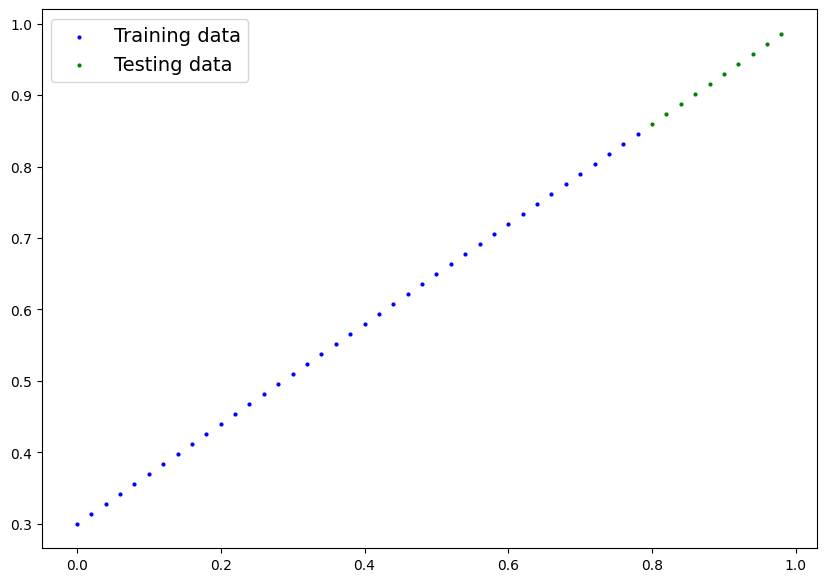

In [106]:
plot_predictions()

##Our first PyTorch model!
This is very exciting... let's do it!

Because we're going to be building classes throughout the course, I'd recommend getting familiar with OOP in Python, to do so you can use the
following resource from Real Python:https://realpython.com/python3-object-oriented-programming .


In [107]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
      super().__init__()
      self.weights = nn.Parameter(torch.rand(1,
                                              requires_grad=True,
                                              dtype=torch.float32))
      self.bias = nn.Parameter(torch.rand(1,
                                          requires_grad=True,
                                          dtype=torch.float32))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias


### PyTorch model building essentials
* torch.nn contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module The base class for all neural network modules,
if you subclass it, you should overwrite forward()
* torch.optim this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() -All nn. Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation


In [108]:
#torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [109]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.2566], requires_grad=True),
 Parameter containing:
 tensor([0.7936], requires_grad=True)]

In [110]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.2566])), ('bias', tensor([0.7936]))])

In [115]:
y_pr=model_0(x_test)
y_pr

tensor([[0.9989],
        [1.0040],
        [1.0092],
        [1.0143],
        [1.0194],
        [1.0246],
        [1.0297],
        [1.0348],
        [1.0400],
        [1.0451]], grad_fn=<AddBackward0>)

In [112]:
## this way is more faster
with torch.inference_mode():
  y_predicte=model_0(x_test)

y_predicte

tensor([[0.9989],
        [1.0040],
        [1.0092],
        [1.0143],
        [1.0194],
        [1.0246],
        [1.0297],
        [1.0348],
        [1.0400],
        [1.0451]])

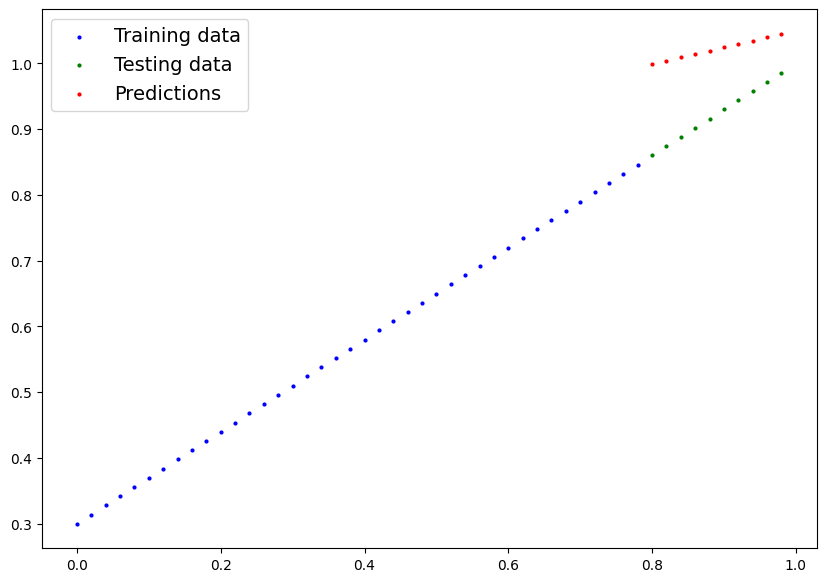

In [113]:
plot_predictions(predictions=y_predicte)